# Data Collection

In [1]:
library(lubridate)
install.packages("zoo")
install.packages("xts")
library(xts)
library(ggplot2)
library(zoo)
library(xts)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
file_name="LSTM-Multivariate_pollution.csv"
data <- read.csv(file_name,header=T)
#Checking size of data column in the dataset
length(data$date)

[1] 43800

In [3]:
show(data)

                     date pollution dew temp    press wnd_dir wnd_spd snow rain
1     2010-01-02 00:00:00       129 -16   -4 1020.000      SE    1.79    0    0
2     2010-01-02 01:00:00       148 -15   -4 1020.000      SE    2.68    0    0
3     2010-01-02 02:00:00       159 -11   -5 1021.000      SE    3.57    0    0
4     2010-01-02 03:00:00       181  -7   -5 1022.000      SE    5.36    1    0
5     2010-01-02 04:00:00       138  -7   -5 1022.000      SE    6.25    2    0
6     2010-01-02 05:00:00       109  -7   -6 1022.000      SE    7.14    3    0
7     2010-01-02 06:00:00       105  -7   -6 1023.000      SE    8.93    4    0
8     2010-01-02 07:00:00       124  -7   -5 1024.000      SE   10.72    0    0
9     2010-01-02 08:00:00       120  -8   -6 1024.000      SE   12.51    0    0
10    2010-01-02 09:00:00       132  -7   -5 1025.000      SE   14.30    0    0
11    2010-01-02 10:00:00       140  -7   -5 1026.000      SE   17.43    1    0
12    2010-01-02 11:00:00       152  -8 

In [4]:
data$date <- as.POSIXct(data$date, format = "%Y-%m-%d %H:%M:%S",by="hour")

# Exploratory Data  Analysis

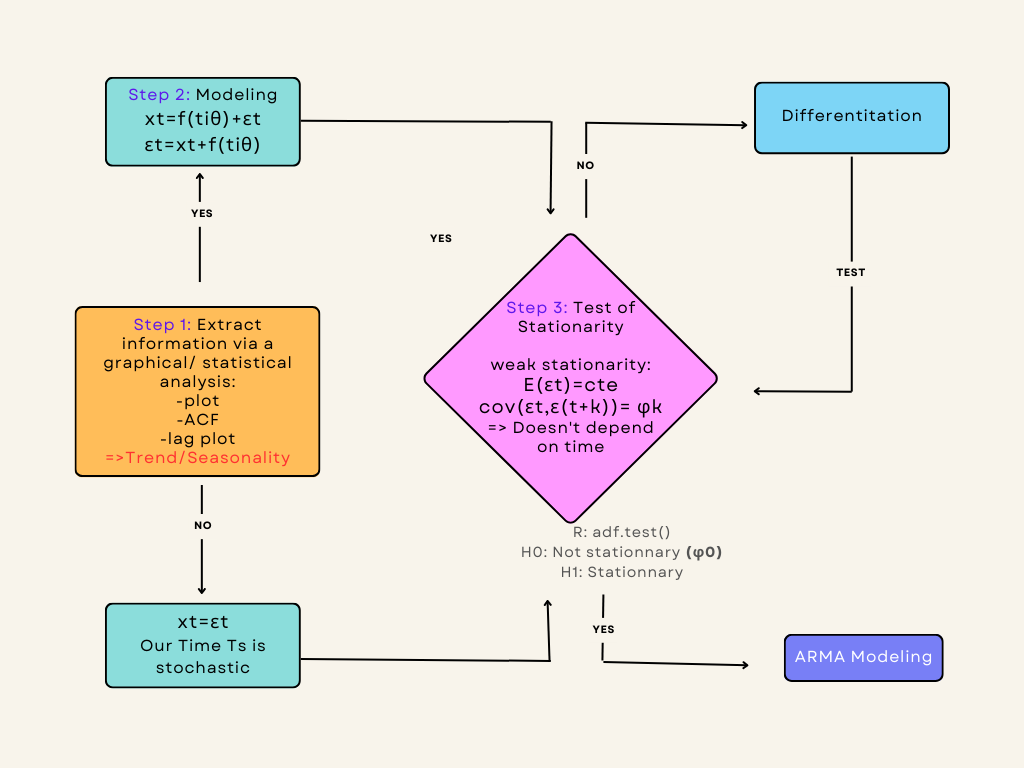

## Hourly

In [5]:
ts.hourly <- ts(data$pollution, frequency = 24)

In [6]:
str(ts.hourly)

 Time-Series [1:43800] from 1 to 1826: 129 148 159 181 138 109 105 124 120 132 ...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



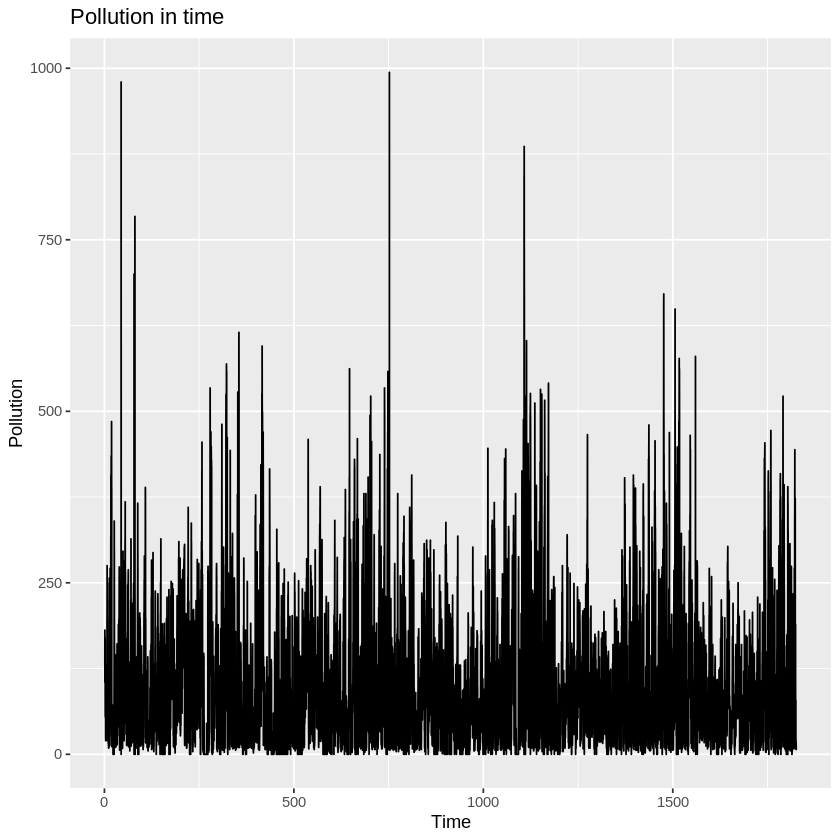

In [7]:
library(ggplot2)
install.packages("ggfortify")
library(ggfortify)
autoplot(ts.hourly, xlab="Time", ylab="Pollution",
     main="Pollution in time")

## Trend

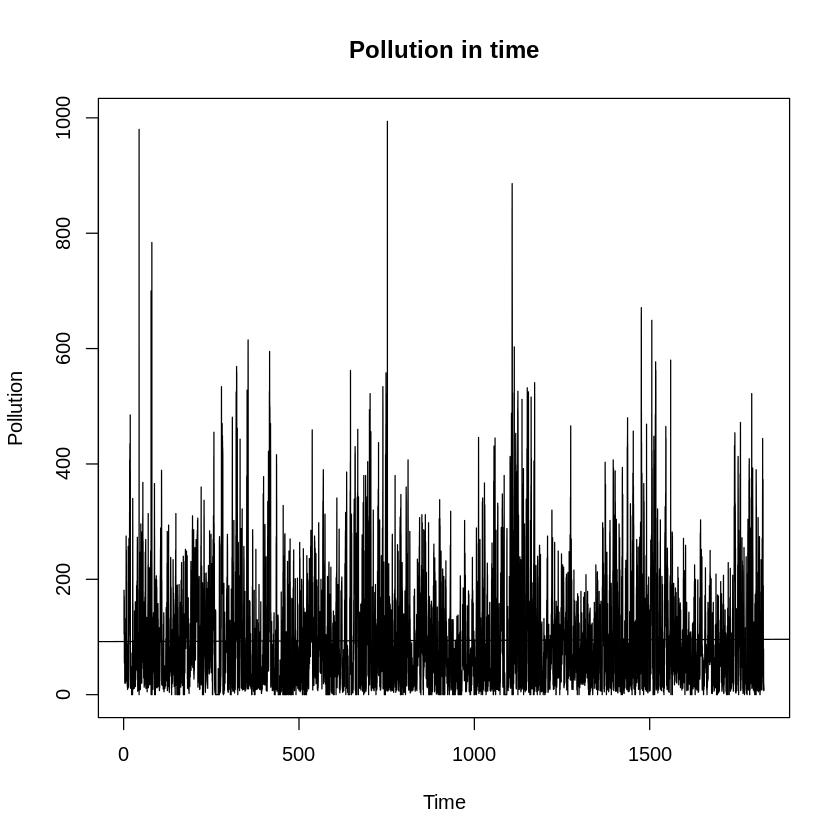

In [8]:
plot(ts.hourly, xlab="Time", ylab="Pollution", main="Pollution in time")
abline(reg=lm(ts.hourly~time(ts.hourly)))

## Monthly

In [9]:
# Aggregate hourly data to monthly using the mean function
monthly_data <- aggregate(pollution ~ format(date, "%Y-%m"), data = data, FUN = mean)

In [10]:
# Convert the monthly data to a time series object
ts.monthly <- ts(monthly_data$pollution, start = c(year(min(data$date)), month(min(data$date))),
              frequency = 12)

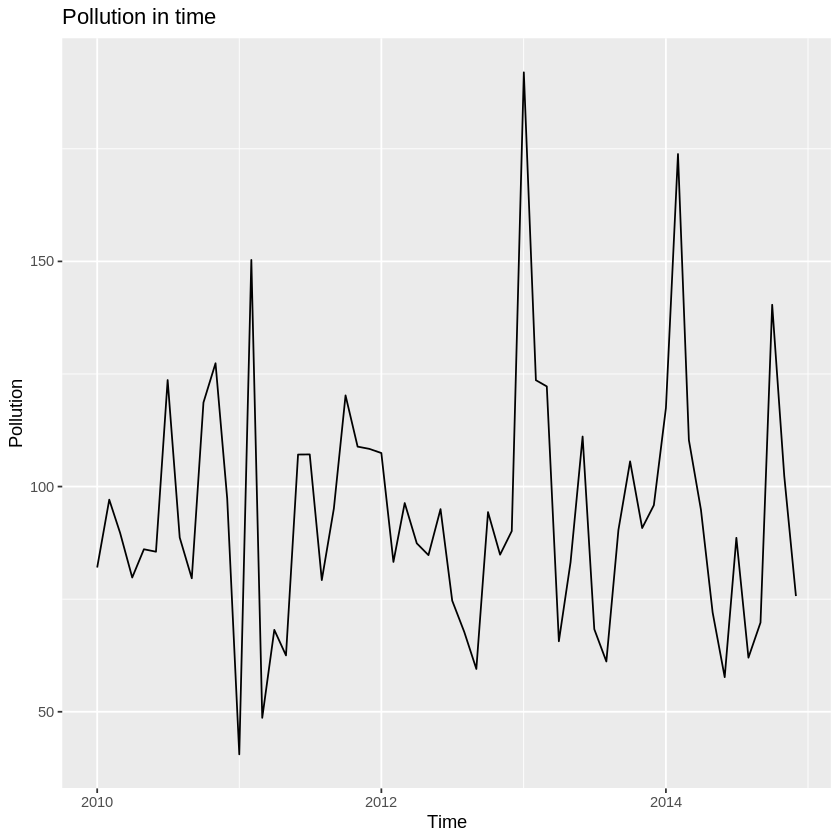

In [11]:
autoplot(ts.monthly, xlab="Time", ylab="Pollution",
     main="Pollution in time")

## Lag plot, ACF and PACF

The following plot provides the bivariate scatter plot for each level of lag (1-16 lags). In this example, the plot is not particularly revealing; but in some cases, this is the most useful way of viewing the autocorrelation values.

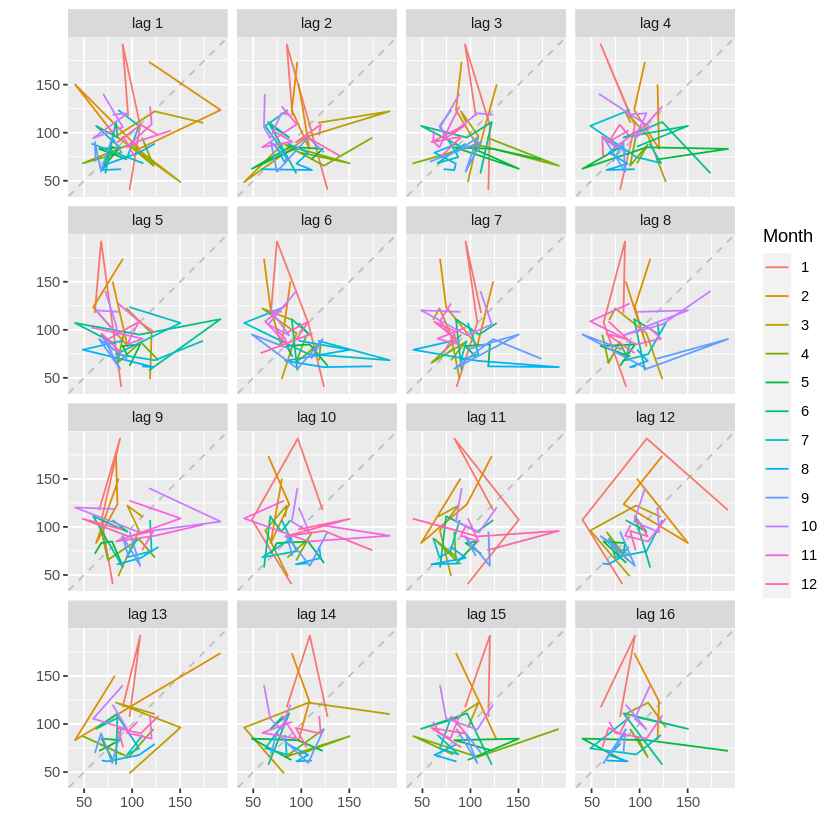

In [42]:
gglagplot(ts.monthly)

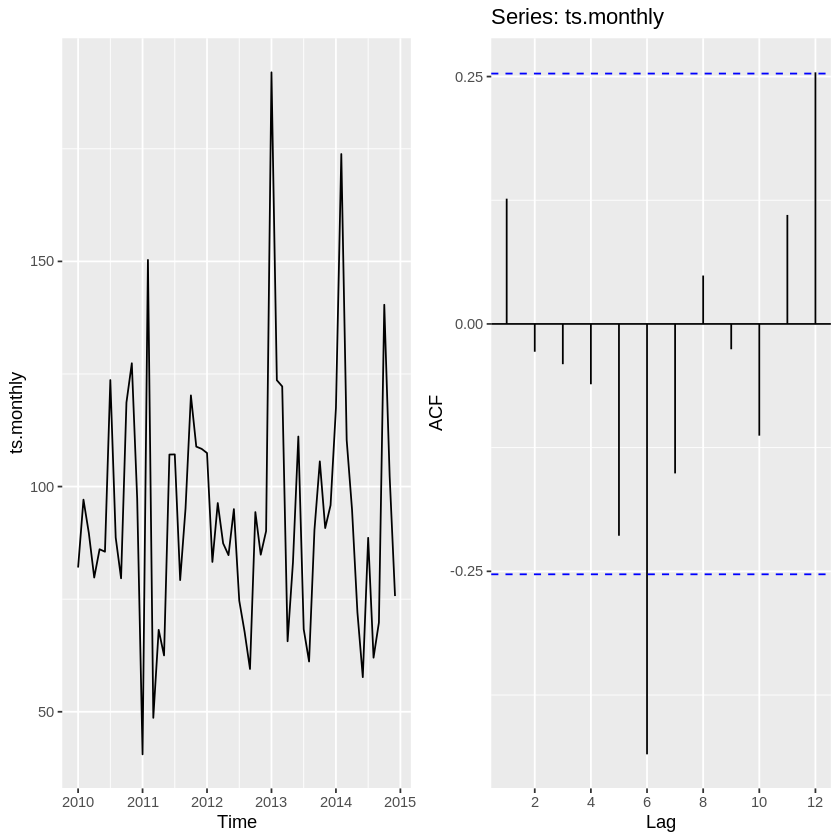

In [41]:
library(gridExtra)
# left plot
left_plot=autoplot(ts.monthly)

# right plot
right_plot=ggAcf(ts.monthly,lag=12)
# Arrange the plots side by side
grid.arrange(left_plot, right_plot, ncol=2)

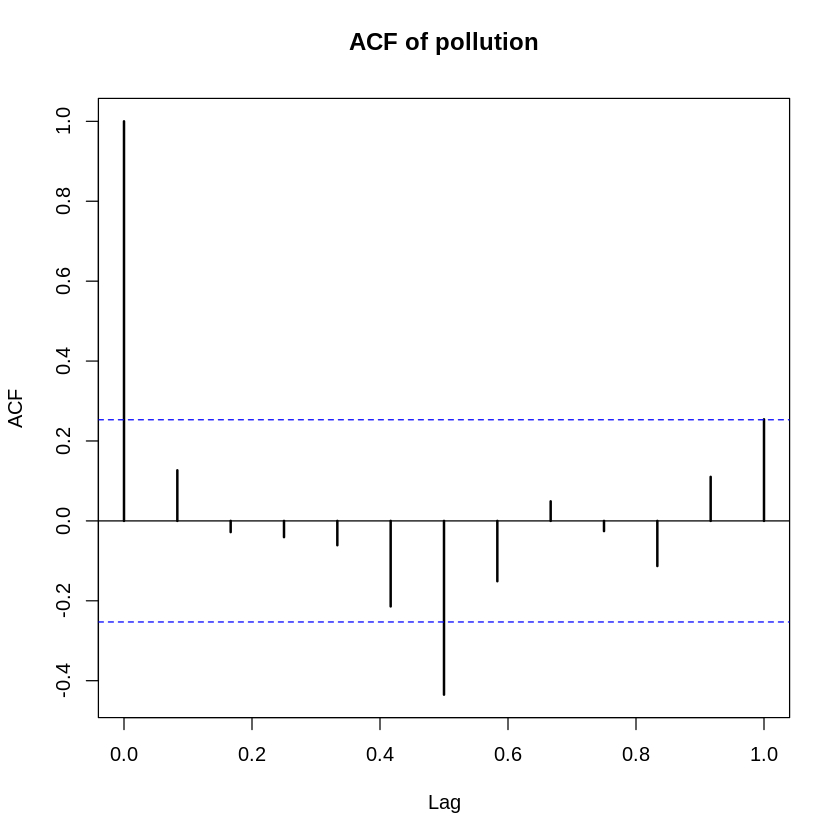

In [32]:
acf(ts.monthly,lag=12,main="ACF of pollution",lwd=2)

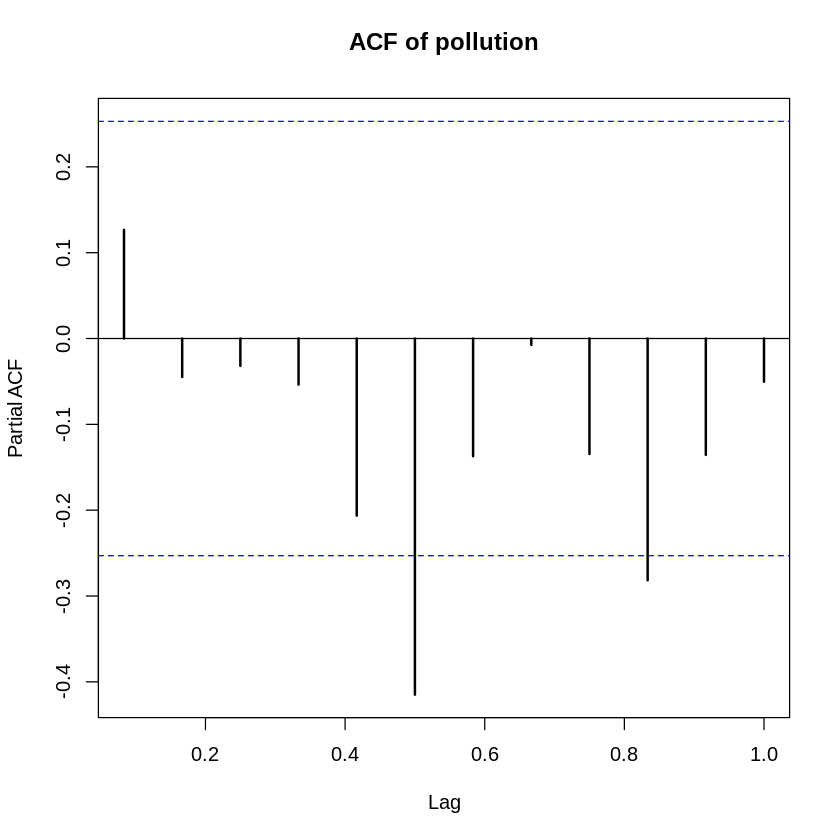

In [31]:
pacf(ts.monthly,lag=12,main="ACF of pollution",lwd=2)

The acf doesn't have a slow decay which confirms our hypothesis of the absence of a trend as well as a damped repetitive behaviour which informs us about the presence of a seasonality.

## Seasonality 

In [21]:
install.packages("ggseasonplot", repos = "http://cran.us.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggseasonplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



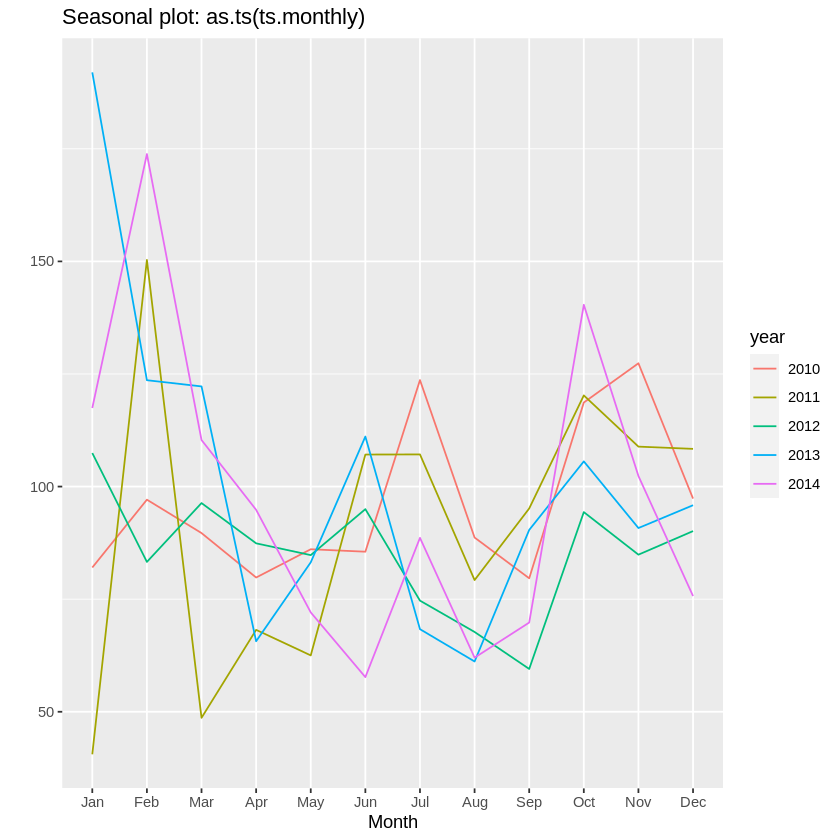

In [51]:
install.packages("forecast")
library(forecast)
forecast::ggseasonplot(x = as.ts(ts.monthly))

A seasonal plot allows the underlying seasonal pattern to be seen more clearly, and can be useful in identifying years in which the pattern changes.

A particular useful variant of a season plot uses polar coordinates, where the time axis is circular rather than horizontal. Here, we plot the ts.monthly data with the conventional seasonal plot versus a polar coordinate option to illustrate this variant. Both plots illustrate a sharp increase in values in Jan and Feb and then a slow decrease from mid-Feb to May.

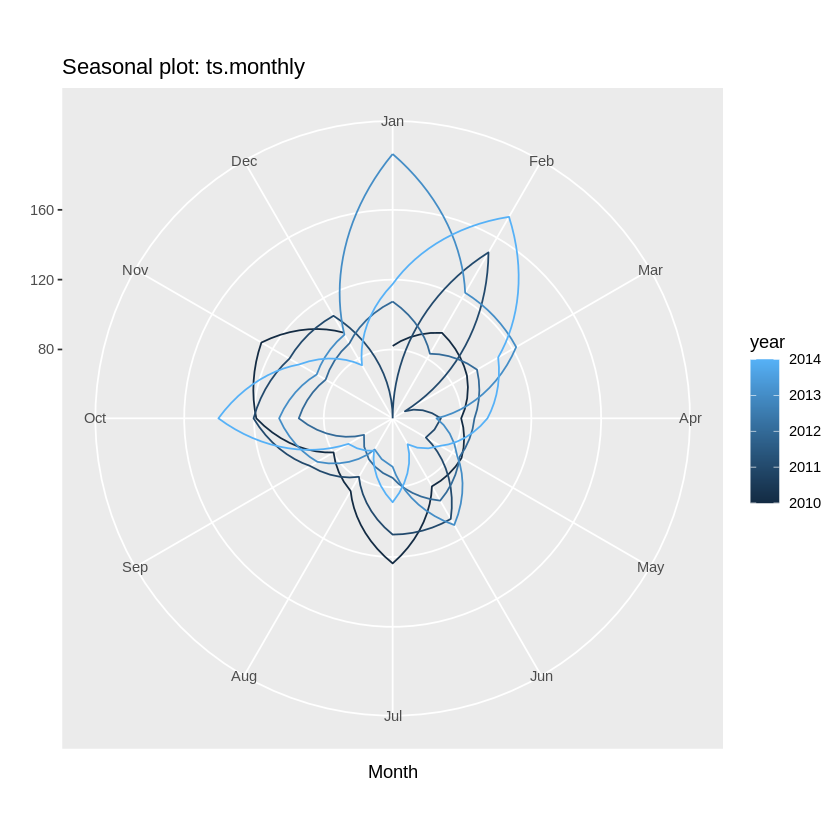

In [28]:
ggseasonplot(ts.monthly, year.labels=FALSE, continuous=TRUE, polar = TRUE)

An alternative plot that emphasizes the seasonal patterns is where the data for each season (monthly in our example) are collected together in separate mini time plots. Here, the mean for each season is shown as a blue horizontal line.

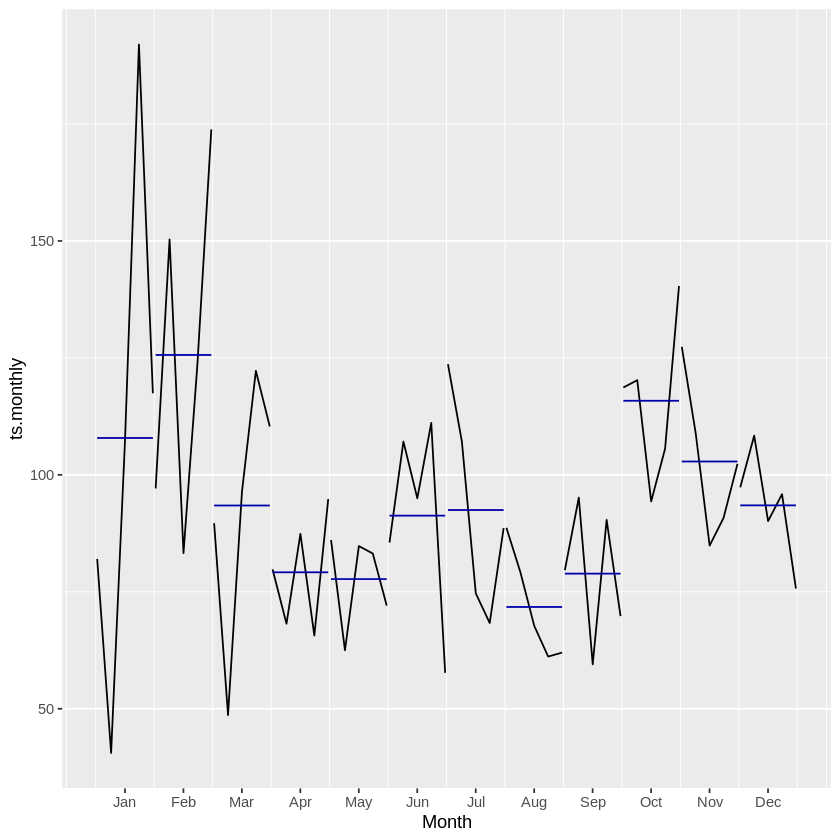

In [30]:
ggsubseriesplot(ts.monthly)

This form of plot enables the underlying seasonal pattern to be seen clearly, and also shows the changes in seasonality over time. It is especially useful in identifying changes within particular seasons.

# Time series modeling

## Deterministic component modeling

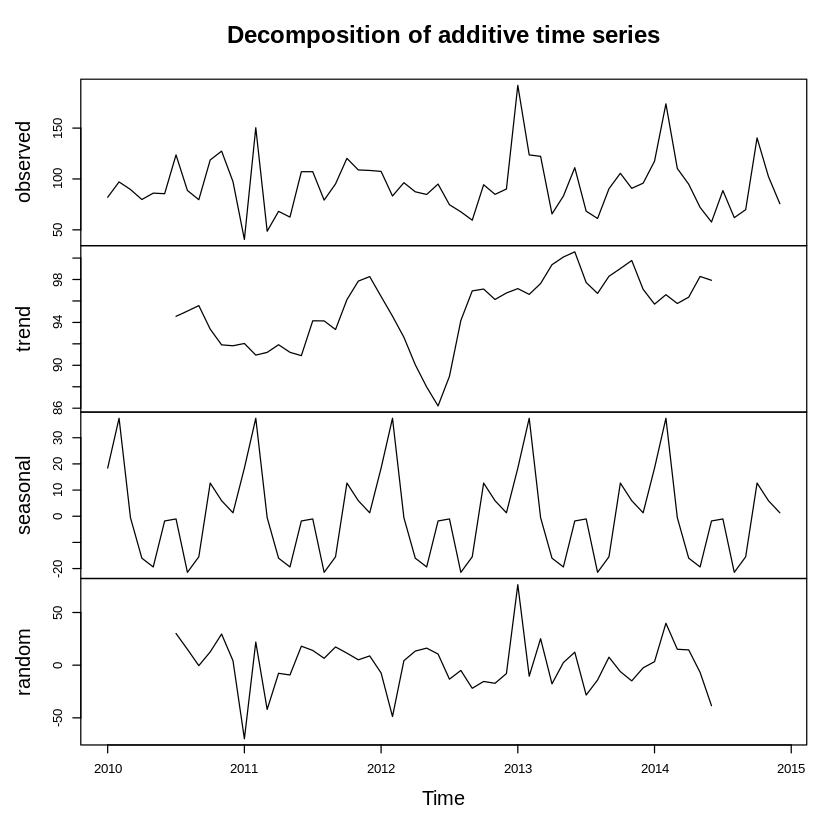

In [65]:
plot(decompose(ts.monthly,type=c("additive")))

## Stationarity 

In [59]:
# Install the tseries package
install.packages("tseries")

# Load the tseries package
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



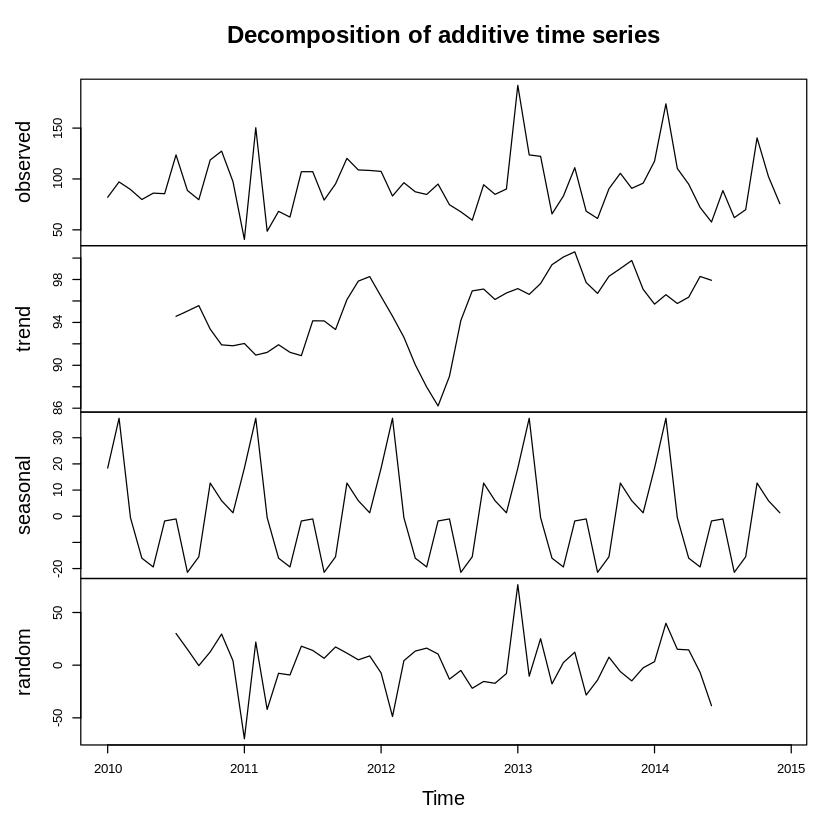

In [67]:
plot(decompose(ts.monthly, type=c("additive")))

The plot does not show a clear trend, it suggests that the original time series does not exhibit a consistent and discernible upward or downward movement over time.

The time series may not have a clear directional trend at all, but rather exhibit a pattern of cyclical or seasonal variations that repeat over time.

# The seasonal component

In [69]:
# Determination of the descriptive variable related to the seasonal component

t<-c(1:length(ts.monthly))
s.t<-(t-mean(t))/sd(t)

# Creating dummy variable
DV<-seasonaldummy(ts.monthly)

In [72]:
Model.1<-lm(ts.monthly~s.t+DV)

summary(Model.1)


Call:
lm(formula = ts.monthly ~ s.t + DV)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.235 -12.259   2.062  11.289  82.983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.9688    11.3769   8.172 1.41e-10 ***
s.t           1.6073     3.3651   0.478    0.635    
DVJan        15.4241    16.1590   0.955    0.345    
DVFeb        33.0731    16.1349   2.050    0.046 *  
DVMar         0.8011    16.1130   0.050    0.961    
DVApr       -13.5637    16.0934  -0.843    0.404    
DVMay       -15.1082    16.0761  -0.940    0.352    
DVJun        -1.6370    16.0611  -0.102    0.919    
DVJul        -0.5337    16.0484  -0.033    0.974    
DVAug       -21.3464    16.0380  -1.331    0.190    
DVSep       -14.3092    16.0299  -0.893    0.377    
DVOct        22.5470    16.0241   1.407    0.166    
DVNov         9.4712    16.0206   0.591    0.557    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.33 on 47 d

In [103]:
Model.1.2 <- lm(ts.monthly ~ s.t + DV[, "Feb"] + DV[, "Oct"] + DV[, "Aug"] + DV[, "Apr"] + DV[, "May"] + DV[, "Sep"] + DV[, "Jan"], data = ts.monthly)
summary(Model.1.2)


Call:
lm(formula = ts.monthly ~ s.t + DV[, "Feb"] + DV[, "Oct"] + DV[, 
    "Aug"] + DV[, "Apr"] + DV[, "May"] + DV[, "Sep"] + DV[, "Jan"], 
    data = ts.monthly)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.133 -11.575   1.284  13.361  82.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   94.578      4.901  19.297   <2e-16 ***
s.t            1.756      3.226   0.544   0.5887    
DV[, "Feb"]   31.502     12.039   2.617   0.0117 *  
DV[, "Oct"]   20.908     11.998   1.743   0.0874 .  
DV[, "Aug"]  -22.968     11.991  -1.916   0.0610 .  
DV[, "Apr"]  -15.152     12.011  -1.261   0.2129    
DV[, "May"]  -16.705     12.002  -1.392   0.1700    
DV[, "Sep"]  -15.940     11.993  -1.329   0.1897    
DV[, "Jan"]   13.862     12.056   1.150   0.2556    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.48 on 51 degrees of freedom
Multiple R-squared:  0.323,	Adjusted R-squared:  0.2168 
F-statistic: 3.

In [101]:
Model.2<-lm(ts.monthly~s.t+I(s.t^2)+DV)
summary(Model.2)


Call:
lm(formula = ts.monthly ~ s.t + I(s.t^2) + DV)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.319 -12.702   1.415  13.336  81.049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  95.1994    12.1089   7.862 4.73e-10 ***
s.t           1.6073     3.3895   0.474   0.6376    
I(s.t^2)     -2.1377     3.7493  -0.570   0.5713    
DVJan        15.4241    16.2763   0.948   0.3483    
DVFeb        33.0030    16.2525   2.031   0.0481 *  
DVMar         0.6750    16.2315   0.042   0.9670    
DVApr       -13.7320    16.2129  -0.847   0.4014    
DVMay       -15.3044    16.1965  -0.945   0.3496    
DVJun        -1.8472    16.1819  -0.114   0.9096    
DVJul        -0.7439    16.1691  -0.046   0.9635    
DVAug       -21.5426    16.1580  -1.333   0.1890    
DVSep       -14.4774    16.1489  -0.896   0.3747    
DVOct        22.4208    16.1419   1.389   0.1715    
DVNov         9.4011    16.1373   0.583   0.5630    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

In [98]:
Model.3 <- lm(ts.monthly ~ s.t + I(s.t^2) + DV[, "Feb"] + DV[, "Oct"] + DV[, "Aug"] + DV[, "Apr"] + DV[, "May"] + DV[, "Sep"] + DV[, "Jan"], data = ts.monthly)
summary(Model.3)


Call:
lm(formula = ts.monthly ~ s.t + I(s.t^2) + DV[, "Feb"] + DV[, 
    "Oct"] + DV[, "Aug"] + DV[, "Apr"] + DV[, "May"] + DV[, "Sep"], 
    data = ts.monthly)

Residuals:
   Min     1Q Median     3Q    Max 
-54.95 -10.86   0.05  10.42  92.83 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   98.911      5.781  17.110   <2e-16 ***
s.t            1.370      3.240   0.423   0.6741    
I(s.t^2)      -2.029      3.630  -0.559   0.5787    
DV[, "Feb"]   29.120     11.970   2.433   0.0185 *  
DV[, "Oct"]   18.649     11.955   1.560   0.1250    
DV[, "Aug"]  -25.338     11.942  -2.122   0.0387 *  
DV[, "Apr"]  -17.583     11.950  -1.471   0.1473    
DV[, "May"]  -19.140     11.944  -1.603   0.1152    
DV[, "Sep"]  -18.261     11.947  -1.528   0.1326    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.72 on 51 degrees of freedom
Multiple R-squared:  0.3097,	Adjusted R-squared:  0.2014 
F-statistic:  2.86 on 8 and

In [104]:
best.model <- Model.1.2

In [106]:
AIC(Model.1)
AIC(Model.1.2) # Lowest
AIC(Model.2)
AIC(Model.3)  

[1] 571.4545

[1] 564.2445

[1] 573.032

[1] 565.4136

In [107]:
BIC(Model.1)
BIC(Model.1.2) # Lowest
BIC(Model.2)
BIC(Model.3)  

[1] 600.7754

[1] 585.188

[1] 604.4472

[1] 586.357

Loading required namespace: broom.mixed



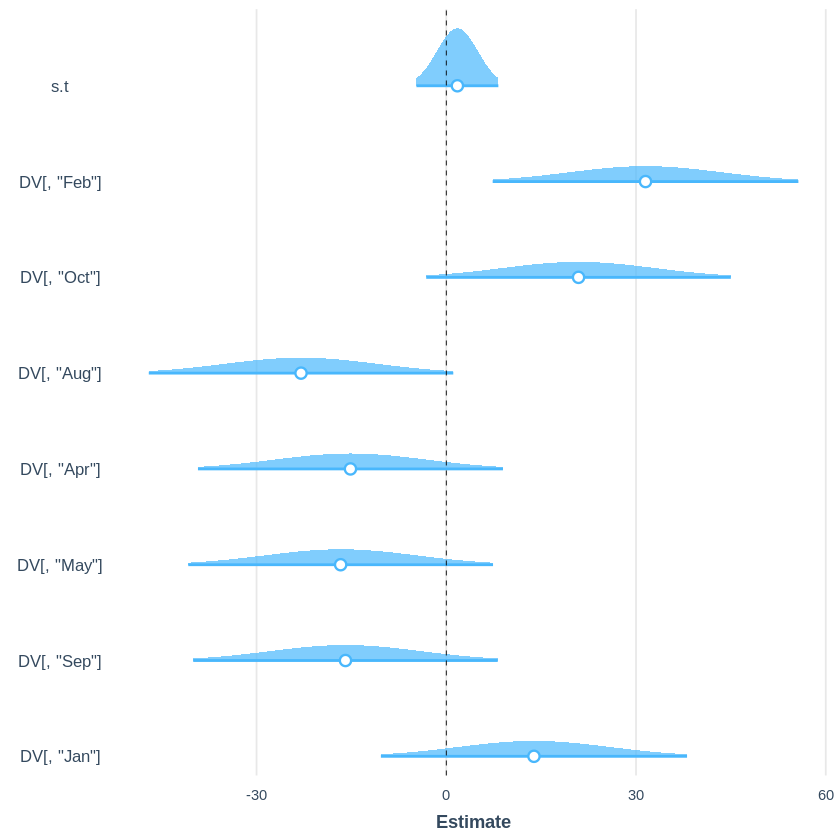

In [114]:
plot_summs(best.model, plot.distributions = TRUE)

In [116]:
install.packages("huxtable")
library(huxtable)

export_summs(best.model, Model.3, scale = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘huxtable’


The following object is masked from ‘package:dplyr’:

    add_rownames


The following object is masked from ‘package:ggplot2’:

    theme_grey




,names,Model 1,Model 2
,<chr>,<chr>,<chr>
,,Model 1,Model 2
1,(Intercept),94.5781172074994 ***,96.916439714984 ***
2,,(4.9010829285078),(4.51274419379436)
3,s.t,1.75568425116077,1.3702601581965
4,,(3.22627894001927),(3.2401301390493)
5,"`DV[, ""Feb""]`",31.5020806243723 *,29.1198770545906 *
6,,(12.0385081542979),(11.9702449663996)
7,"`DV[, ""Oct""]`",20.9079303610785,18.64906770636
8,,(11.9976167502549),(11.9548344601682)


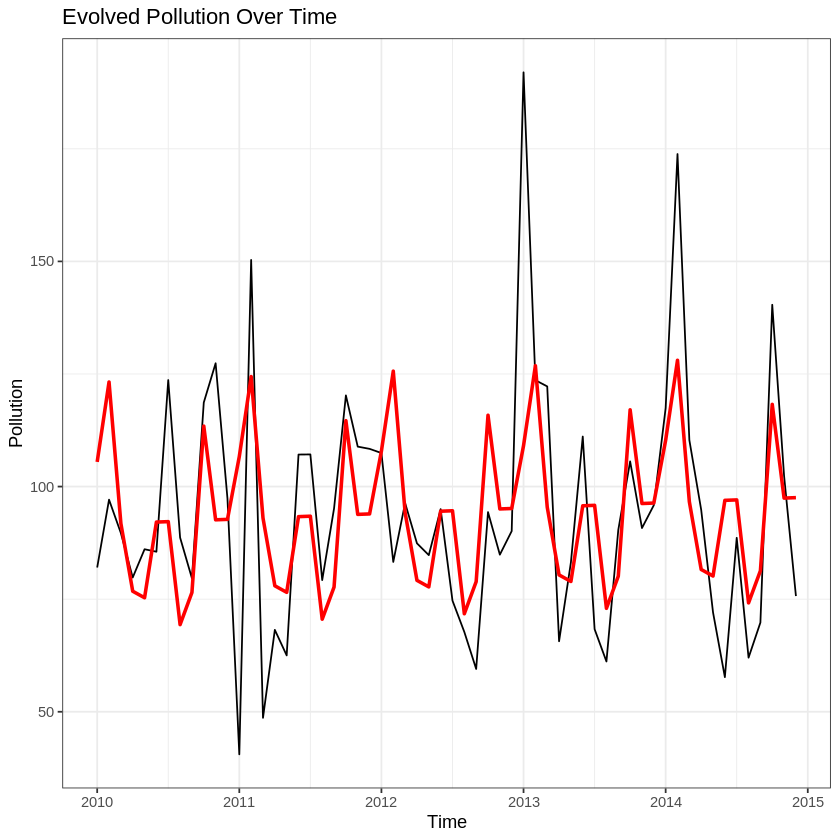

In [120]:
autoplot(ts.monthly) +
  xlab("Time") +
  ylab("Pollution") +
  ggtitle("Evolved Pollution Over Time") +
  geom_line(aes(y = fitted(best.model)), color = "red", size = 1) +
  scale_color_manual(values = c("blue", "red")) +
  labs(color = "Series") +
  theme_bw() +
  theme(legend.position = "topleft")

# Stochastic Component

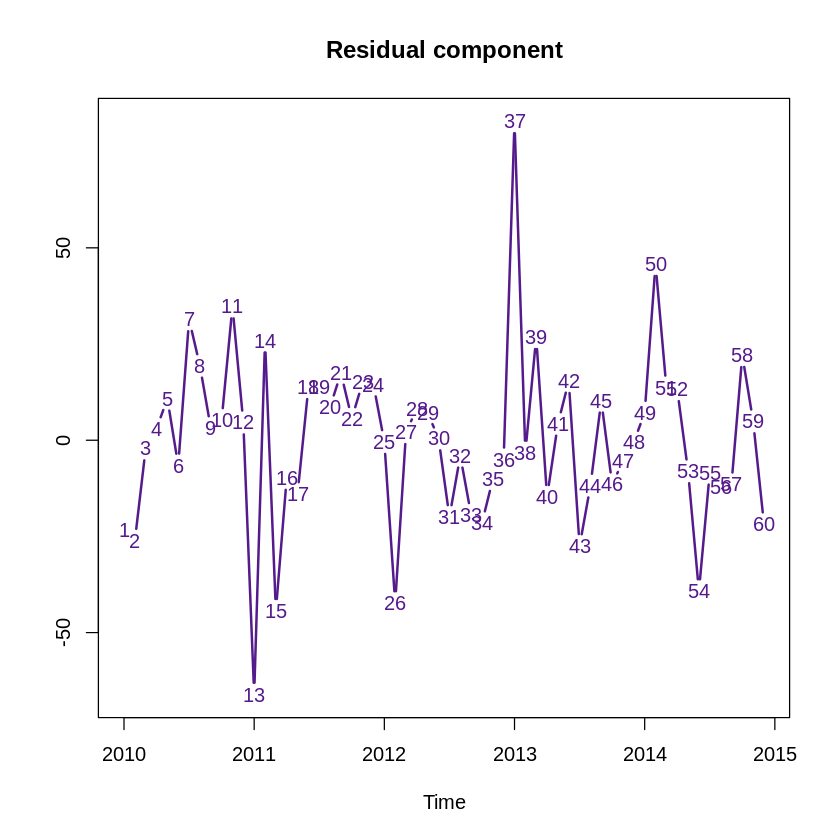

In [127]:
sp.res<-best.model$residuals

plot(time(ts.monthly),sp.res, xlab="Time", ylab="",
main="Residual component",
col="purple4",lwd=2,type="l")

In [128]:
library(tseries)

adf.test(sp.res)

Warning message in adf.test(sp.res):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  sp.res
Dickey-Fuller = -4.3164, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


In [129]:
# Load the urca package
library(urca)


# Perform the KPSS test
kpss_test <- ur.kpss(sp.res)

# Print the test results
summary(kpss_test)



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.033 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Residuals are stationary


	Box-Pierce test

data:  sp.res
X-squared = 0.021887, df = 1, p-value = 0.8824


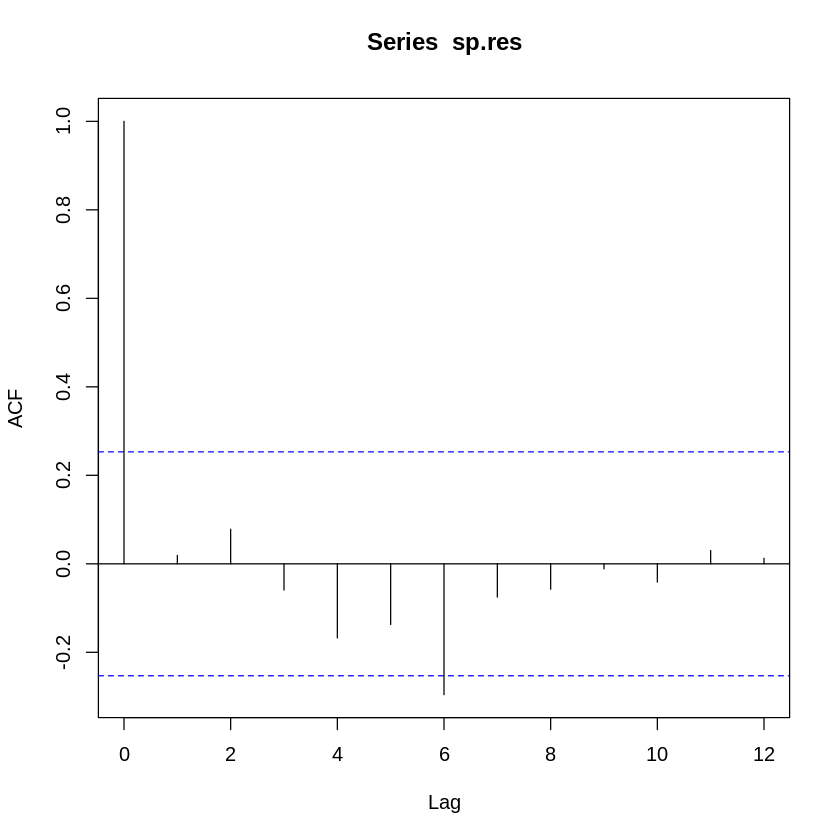

In [132]:
acf(sp.res, lag=12)
Box.test(sp.res)

we can conclude that there is no significant evidence to reject the null hypothesis that the residuals are white noise. Therefore, the residuals are likely random and independent of each other, indicating that the model is a good fit for the data.

In [136]:
# Perform the Ljung-Box test with up to 12 lags
lb_test <- Box.test(ts.monthly, lag = 12, type = "Ljung-Box")

# Print the test results
print(lb_test)


	Box-Ljung test

data:  ts.monthly
X-squared = 26.246, df = 12, p-value = 0.009904



Here, we perform a Ljung-Box test on the first 12 lag autocorrelations. The resulting p-value is significant at p<.001. So, this supports our ACF plot consideration above where we stated it’s likely this is not purely white noise and that some time series information exists in this data

# ARIMA Model

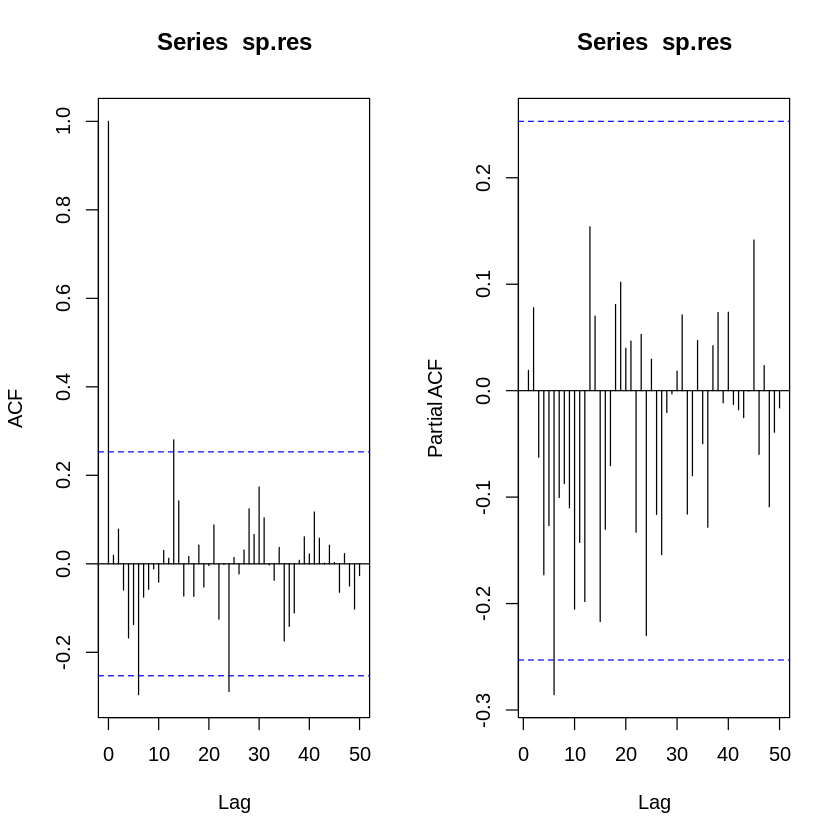

In [137]:
par(mfrow=c(1,2))
acf(sp.res,50)
pacf(sp.res,50)

It is difficult to determine p and q from the plots of the acf and pacf.
We can use the auto.arima() function of the forecast package.

In [141]:
ARIMA=auto.arima(sp.res,d=0,trace=TRUE)


 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : 548.4551
 ARIMA(1,0,0) with non-zero mean : 550.6508
 ARIMA(0,0,1) with non-zero mean : 550.6539
 ARIMA(0,0,0) with zero mean     : 546.3135
 ARIMA(1,0,1) with non-zero mean : Inf

 Best model: ARIMA(0,0,0) with zero mean     



Warning message in adf.test(Model.res$residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Model.res$residuals
Dickey-Fuller = -4.3164, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 10.571, df = 10, p-value = 0.3919

Model df: 0.   Total lags used: 10



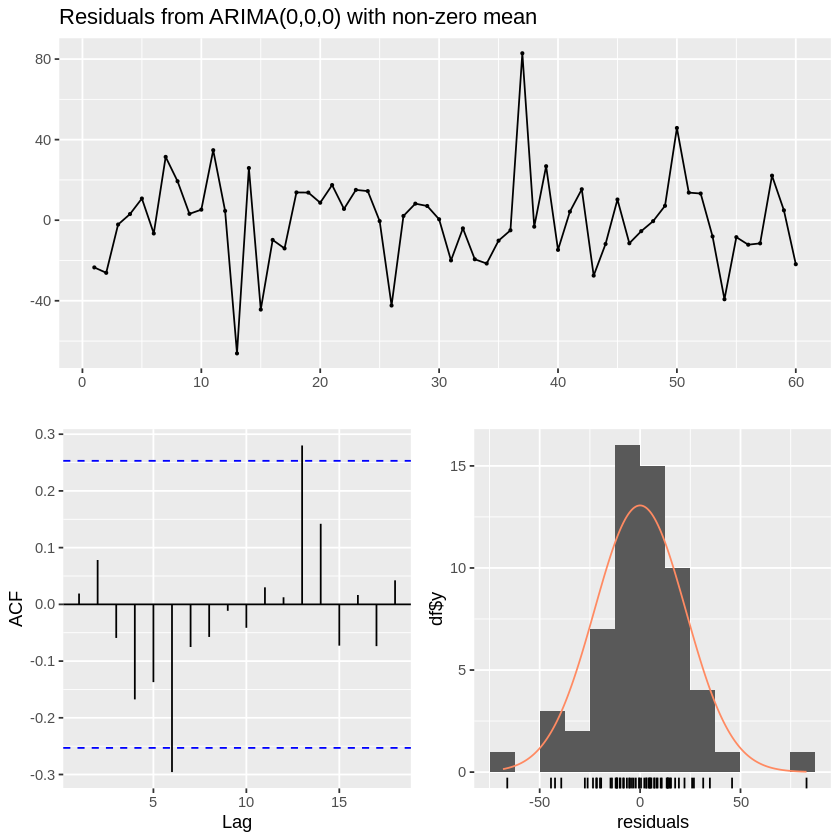

In [142]:
Model.res<-arima(sp.res,order = c(0, 0, 0))

adf.test(Model.res$residuals)
checkresiduals(Model.res)

In [163]:
arima(sp.res, order = c(0, 0, 0),seasonal = list(order = c(0,1,2), period = 12))$sigma2
arima(sp.res, order = c(0, 0, 0),seasonal = list(order = c(3,0,3), period = 12))$sigma2 #the selected model
arima(sp.res, order = c(0, 0, 0),seasonal = list(order = c(2,1,0), period = 12))$sigma2
arima(sp.res, order = c(0, 0, 0),seasonal = list(order = c(2,1,1), period = 12))$sigma2

[1] 637.2981

[1] 70.6494

[1] 768.2402

[1] 690.4491

The second model has a seasonal order of (3,0,3), which means it includes three seasonal AR terms, three seasonal MA terms, and no seasonal differences. The estimated sigma^2 for this model is 70.649.

The model with the lowest estimated sigma^2 (i.e., the smallest value) is the one that fits the data best, and should be selected as the final model. In this case, the second model with seasonal order (3,0,3) has the lowest estimated sigma^2, indicating that it fits the data the best among the four models tested.

Warning message in adf.test(Model.res.s$residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Model.res.s$residuals
Dickey-Fuller = -4.305, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



Call:
arima(x = sp.res, order = c(0, 0, 0), seasonal = list(order = c(3, 0, 3), period = 12))

Coefficients:
        sar1     sar2    sar3     sma1    sma2     sma3  intercept
      0.7019  -0.9695  0.0965  -2.2802  2.1878  -0.8722    -0.3347
s.e.  0.6964   0.4037  0.5987   1.7985  2.9700   1.8382     0.7511

sigma^2 estimated as 70.65:  log likelihood = -258.23,  aic = 532.45

Training set error measures:
                     ME    RMSE      MAE      MPE     MAPE      MASE
Training set 0.08760698 8.40532 6.443967 47.41405 105.8645 0.2839551
                     ACF1
Training set -0.004873485


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(3,0,3)[12] with non-zero mean
Q* = 6.1871, df = 4, p-value = 0.1856

Model df: 6.   Total lags used: 10



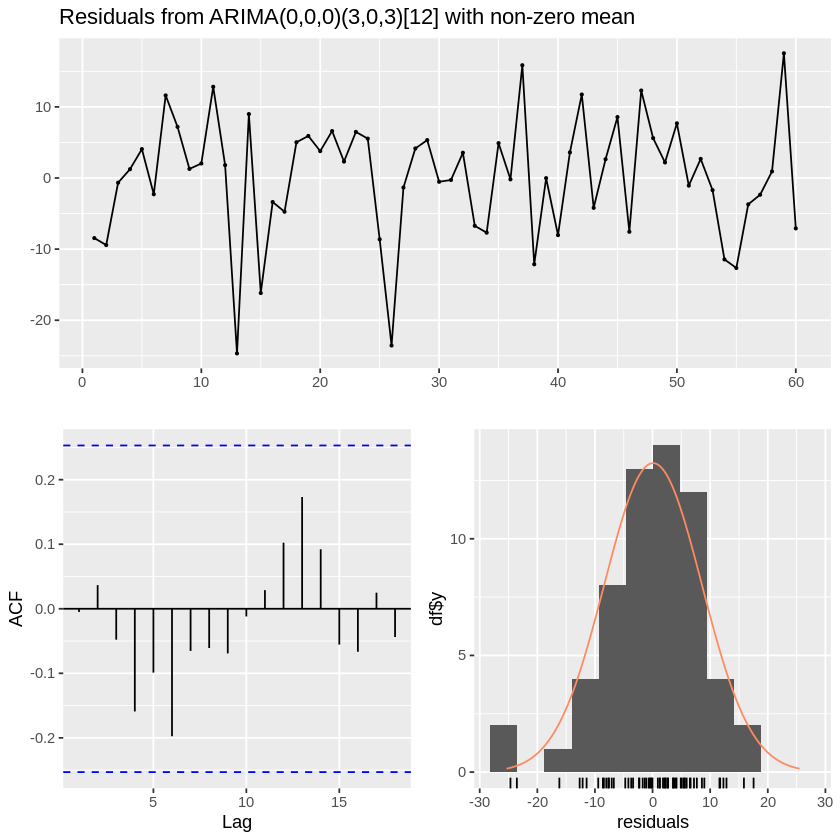

In [164]:
Model.res.s<-arima(sp.res, order = c(0, 0, 0),seasonal = list(order = c(3, 0, 3), period = 12))
adf.test(Model.res.s$residuals)
summary(Model.res.s)
checkresiduals(Model.res.s)

# Model Interpretation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘aTSA’


The following objects are masked from ‘package:fabletools’:

    estimate, forecast


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:forecast’:

    forecast


The following object is masked from ‘package:graphics’:

    identify




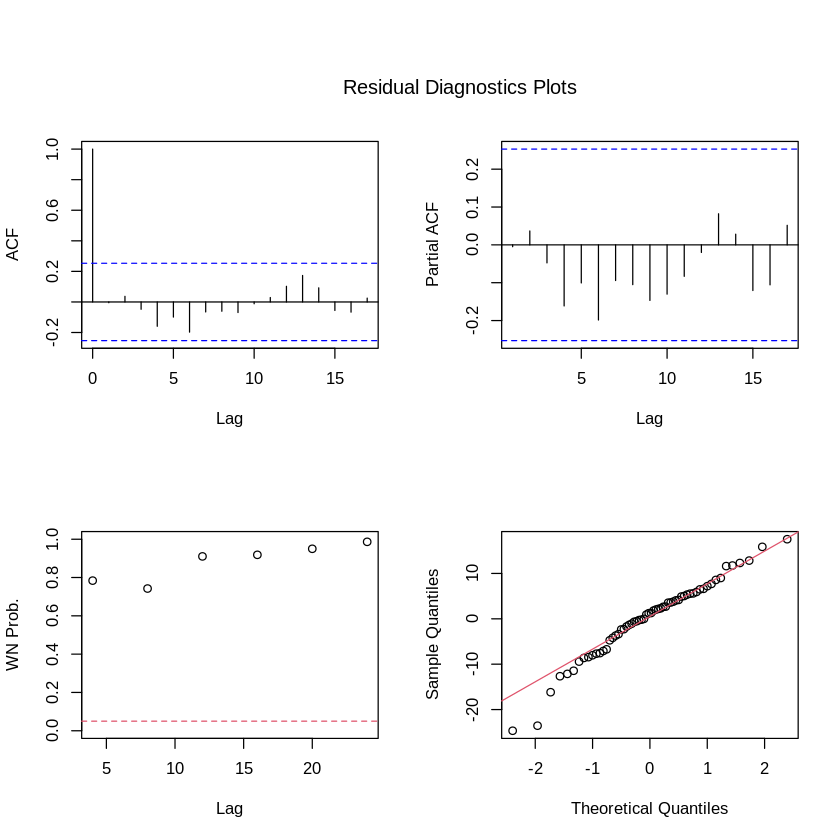

In [165]:
install.packages("aTSA")

library(aTSA)
ts.diag(Model.res.s)

# Forecasting

Forecast for univariate time series: 
    Lead Forecast  S.E  Lower  Upper
61     1  -49.883 10.5 -70.42 -29.35
62     2   -1.987 10.5 -22.52  18.55
63     3  -13.262 10.5 -33.79   7.27
64     4    1.009 10.5 -19.52  21.54
65     5   -0.646 10.5 -21.18  19.89
66     6    8.342 10.5 -12.19  28.87
67     7   44.184 10.5  23.65  64.72
68     8   15.180 10.5  -5.35  35.71
69     9    3.742 10.5 -16.79  24.27
70    10   11.197 10.5  -9.34  31.73
71    11  -18.501 10.5 -39.03   2.03
72    12   12.883 10.5  -7.65  33.42
73    13  -37.797 16.8 -70.66  -4.93
74    14  -25.387 16.8 -58.25   7.48
75    15  -22.503 16.8 -55.37  10.36
76    16   -4.714 16.8 -37.58  28.15
77    17    2.257 16.8 -30.61  35.12
78    18   16.670 16.8 -16.19  49.53
79    19   13.244 16.8 -19.62  46.11
80    20   12.316 16.8 -20.55  45.18
81    21    5.531 16.8 -27.33  38.39
82    22   -9.556 16.8 -42.42  23.31
83    23    9.887 16.8 -22.98  42.75
84    24   13.071 16.8 -19.79  45.93
85    25   20.813 16.6 -11.69  53.31


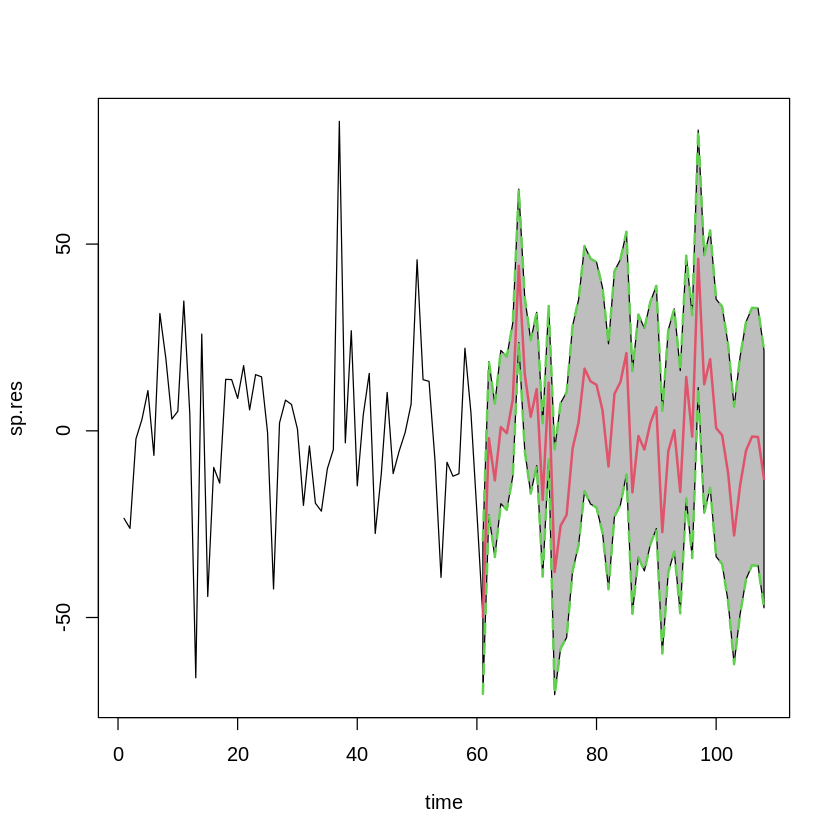

In [166]:
forecast(Model.res.s, 48)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(3,0,3)[12] with non-zero mean
Q* = 11.758, df = 6, p-value = 0.06758

Model df: 6.   Total lags used: 12



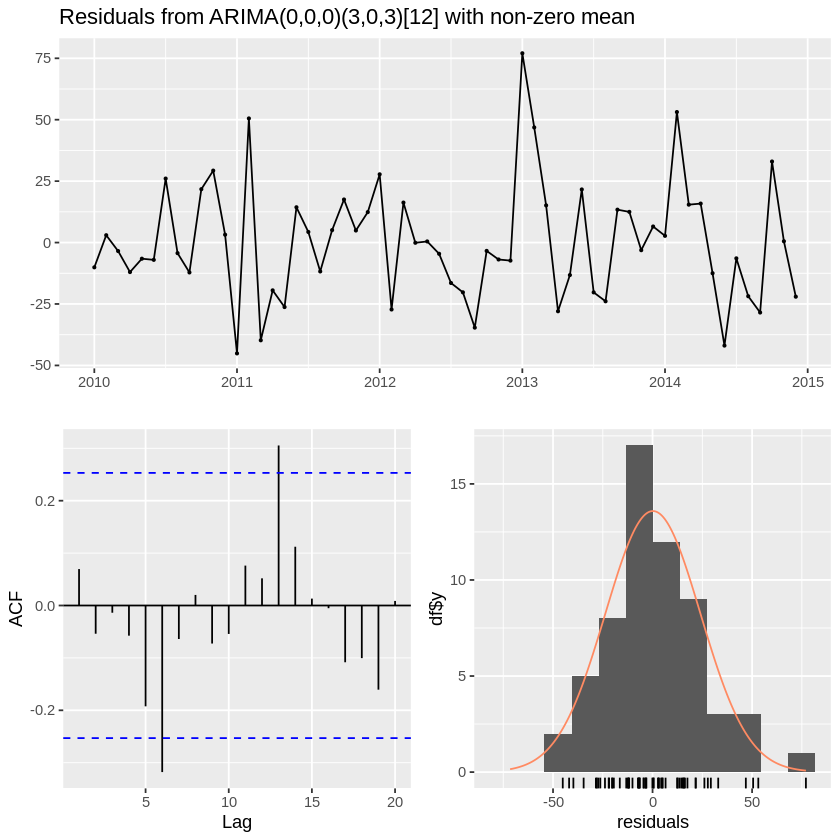

In [168]:
Model.SARIMA.fit<-arima(ts.monthly, order = c(0, 0, 0),seasonal = list(order = c(3, 0, 3), period = 12))
checkresiduals(Model.SARIMA.fit)

Forecast for univariate time series: 
    Lead Forecast  S.E Lower Upper
61     1     72.9 24.4  25.0   121
62     2    115.7 24.4  67.8   164
63     3     88.5 24.4  40.6   136
64     4     96.6 24.4  48.6   144
65     5     83.7 24.4  35.8   132
66     6     76.5 24.4  28.5   124
67     7     99.6 24.4  51.6   147
68     8     83.9 24.4  35.9   132
69     9     76.6 24.4  28.7   125
70    10    112.2 24.4  64.3   160
71    11    101.2 24.4  53.3   149
72    12     87.5 24.4  39.6   135
73    13     94.8 25.6  44.5   145
74    14     89.5 25.6  39.3   140
75    15     88.4 25.6  38.2   139
76    16     84.0 25.6  33.7   134
77    17     89.4 25.6  39.2   140
78    18    102.1 25.6  51.8   152
79    19     94.6 25.6  44.3   145
80    20     88.1 25.6  37.8   138
81    21     89.1 25.6  38.9   139
82    22     94.6 25.6  44.3   145
83    23     97.4 25.6  47.2   148
84    24     98.6 25.6  48.3   149
85    25    109.2 25.8  58.6   160
86    26    107.1 25.8  56.5   158
87    27     95.5

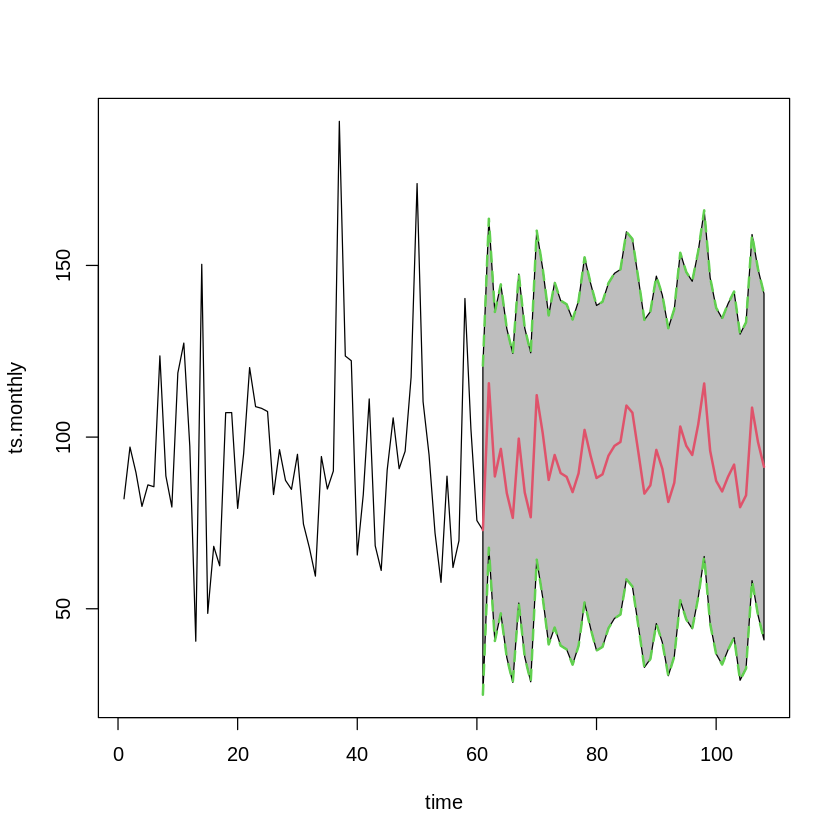

In [169]:
forecast(Model.SARIMA.fit, 48)